In [53]:
import sys
sys.executable

'/Users/lvinnichenko/dev/school/dl/.venv/bin/python'

In [54]:
import requests
requests.packages.urllib3.disable_warnings()
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

In [55]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data();

In [56]:
train_images.shape

(60000, 28, 28)

In [57]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [58]:
train_labels.shape

(60000,)

In [59]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [60]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [61]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

In [62]:
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [63]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [64]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.4206 - accuracy: 0.8758
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1104 - accuracy: 0.9670
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0681 - accuracy: 0.9799
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0501 - accuracy: 0.9859
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0366 - accuracy: 0.9893


In [65]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.0660 - accuracy: 0.9801


In [66]:
test_loss

0.06597790867090225

In [67]:
test_acc

0.9800999760627747

In [68]:
digit = train_images[7]
digit = digit.reshape((28, 28))

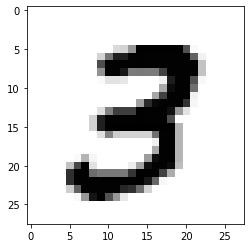

In [69]:
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)